[22.1]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


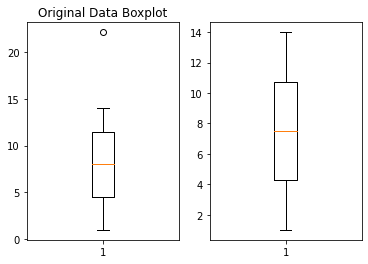

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

figure = plt.figure()

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)

ax1.set_title('Original Data Boxplot')
ax1.boxplot(data)

# numpy로 사분위 값을 구해서 Turkey Fence 방식으로 이상치를 판단
first = np.percentile(data, 25) # 1사분위
third = np.percentile(data, 75) # 3사분위

IQR_value = third - first
upper_fence = third + (IQR_value * 1.5)
lower_fence = first - (IQR_value * 1.5)

# boolean indexing을 이용해서 outlier를 추출
print(data[(data > upper_fence) | (data < lower_fence)])

# boolean indexing을 이용해서 이상치 제거 나머지 데이터 추출
result = data[(data <= upper_fence) & (data >= lower_fence)]
result1 = data[~((data > upper_fence) | (data < lower_fence))]
print(result)
print(result1)
ax2.boxplot(result)
plt.show()

In [13]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

mean = data.mean()
std = data.std()

zscore_data = (data - mean) / std

print(zscore_data)

[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]


In [23]:
# scipy는 sklearn과 유사한 통계전용 모듈
from scipy import stats
data = np.array([-10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22.1])

zscore_threshold = 2.0
outlier = data[np.abs(stats.zscore(data)) > zscore_threshold]
print(outlier)

data[np.isin(data, outlier, invert=True)]

[-10.   22.1]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])